Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

loading the dataset from csv to pandas dataframe


In [5]:
gold = pd.read_csv("/Users/adityasoni/Desktop/Gold price/gld_price_data.csv")

In [6]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold.shape

(2290, 6)

Additional info on Data, like data types of the columns

In [10]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

If we find any missing value, we do a process called "Imputation" for replacing missing value with either mean or median

In [12]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation among columns. Weather positive or negative

In [13]:
correlation_data = gold.corr()

<AxesSubplot:>

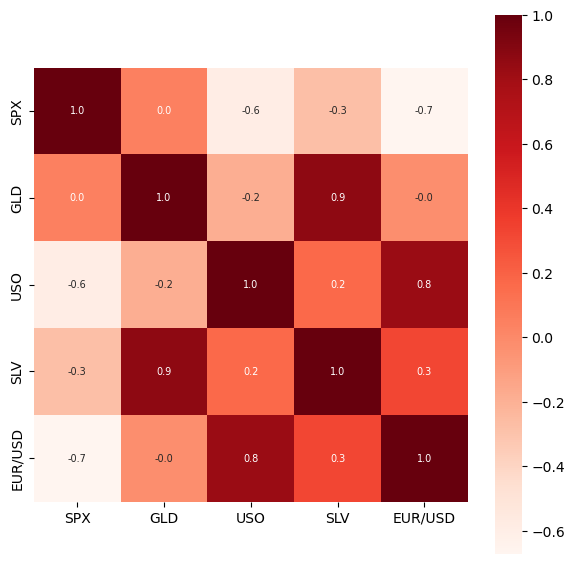

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation_data, cbar = True, square = True, fmt='.1f',annot=True, annot_kws={'size':7},cmap='Reds')

In [20]:
print(correlation_data['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

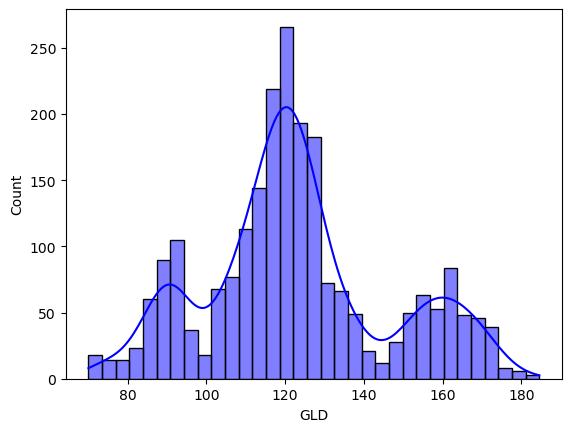

In [28]:
sns.histplot(gold['GLD'], color = 'Blue', kde=True)

Splitting dependent variable(GLD) with other metrics(USO,SLV,SPX,USD/EUR)

In [30]:
x=gold.drop(['GLD','Date'], axis = 1)
y=gold['GLD']

In [31]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Training ML Model with Training data and evaluate regressor using Test Data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

Model Training using random forest Regressor: A random forest is just a collection of multiple decision trees where the prediction is made using all the decision trees combined.

In [34]:
rm= RandomForestRegressor(n_estimators = 100)

In [36]:
rm.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
testData_prediction= rm.predict(x_test)

In [38]:
print(testData_prediction)

[168.71819947  82.18419977 115.98370062 127.76250088 120.8158013
 154.73229719 150.15379798 126.06140053 117.52669875 126.06300003
 116.86020063 172.0744009  141.20329738 168.14549832 115.16470001
 117.95710038 138.03240309 170.15400079 159.28080226 161.77339987
 155.20320048 125.02539992 176.09339944 157.50860292 125.20630055
  93.86479973  78.35390018 120.59060006 119.08139929 167.42029971
  88.20440102 125.17630009  91.16770072 117.71930037 121.05639939
 137.08170184 115.79940126 115.54510063 148.46569914 107.02570074
 104.84290231  87.28359804 126.53490021 117.96389944 151.89479861
 119.52039995 108.34350019 108.02889823  93.27290068 127.16809732
  75.16769999 113.63449946 121.3381999  111.30899916 118.84989875
 121.06239932 158.80450022 168.33930172 147.06879681  85.74319881
  94.27700034  86.80219908  90.42159989 118.94860095 126.37580022
 127.44499998 169.61400011 122.26409912 117.43049907  98.38510018
 168.45480107 143.27019858 132.03430243 121.13700193 121.00569954
 119.776400

RMS (squared error method)

In [40]:
error=metrics.r2_score(y_test,testData_prediction)
print("R Squared error:", error)


R Squared error: 0.989037703035235


Convert pandas series dataframe (y_test) to a list

In [41]:
y_test = list(y_test)

Comparision between actual and predicted value in a plot.

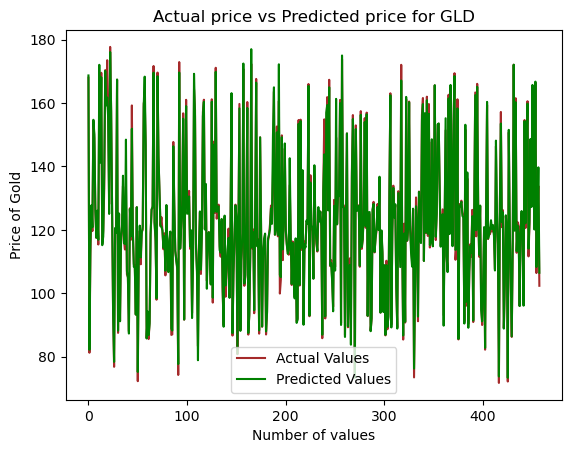

In [47]:
plt.plot(y_test, color = "Brown", label = "Actual Values")
plt.plot(testData_prediction, color = "Green", label = "Predicted Values")
plt.title("Actual price vs Predicted price for GLD")
plt.xlabel("Number of values")
plt.ylabel('Price of Gold')
plt.legend()
plt.show()